# Introduction

Floods are common natural disasters that cause loss of life and damage to property.  
This project analyzes past and current flood data to find patterns and understand the main causes.  
The aim is to use these insights for better flood prediction and control.

## 1. Historical Data Analysis
Study of previous flood events to identify trends and long-term patterns.

### Section 1: Data Loading

In [3]:
import pandas as pd

In [4]:
# Historical Data Load
try :
    hist_df = pd.read_csv("../data/historical_data.csv")
    display(hist_df.head())
    
except FileNotFoundError:
    hist_df = None
    print("historical_data.csv not found ")

,year,region,people_affected,houses_damaged,fatalities,notes,source
0,2001,"Islamabad, Rawalpindi (Punjab), Mansehra (KP)",NaN,5000.0,230,Extreme cloudburst in Islamabad/Rawalpindi; vi...,"IFRC, UN-OCHA 15"
1,2002,"Mardan, Sofaid Sung (KP)",100 families,NaN,NaN,Heavy rains in KP; major agricultural damage.,IFRC 15
2,2003,"Sindh (Thatta), Balochistan",1096726,166658.0,484,Severe urban flooding in Karachi; above-normal...,"OCHA, Wikipedia 19"
3,2004,"Eastern Pakistan, Punjab",1200000,7000.0,800,Heavy rains and water release from Indian dams.,"PBS, NDTV 22"
4,2005,"Balochistan (Gwadar), KP, Northern Areas",70000,NaN,400,Dam burst in Balochistan after heavy rain/snow.,"NASA, OCHA 24"


### Section 2 : Data Cleanning

In [5]:
hist_df.dtypes

year                 int64
region              object
people_affected     object
houses_damaged     float64
fatalities          object
notes               object
source              object
dtype: object

In [6]:
# Convert ALL numeric columns to Int64
for col in ['people_affected', 'houses_damaged', 'fatalities']:
    hist_df[col] = (hist_df[col].astype(str).str.replace('[^0-9-]', '', regex=True)     
        .str.split('-').str[0])
    hist_df[col] = pd.to_numeric(hist_df[col], errors='coerce').astype('Int64')

In [7]:
# check updated DataTypes
hist_df.dtypes

year                int64
region             object
people_affected     Int64
houses_damaged      Int64
fatalities          Int64
notes              object
source             object
dtype: object

In [8]:
# Finding Null Values
hist_df.isnull().sum().sort_values(ascending = False)

people_affected    5
houses_damaged     5
fatalities         2
region             0
year               0
notes              0
source             0
dtype: int64

In [9]:
# Handling Null Values by Source "ReliefWeb"
fill_affected_values = {
    2001: 55000,
    2006: 10000,
    2012: 5056489,
    2016: 1000,
}
hist_df['people_affected'] = hist_df.apply(
    lambda row: fill_affected_values.get(row['year'], row['people_affected'])
             if pd.isna(row['people_affected']) else row['people_affected'],
    axis = 1 )

In [10]:
hist_df['people_affected'].isnull().sum()

np.int64(1)

In [11]:
# Fill House Damaged By Source ReliefWeb
fill_damaged_values = {
    2002 : 5000,
    2005 : 780000,
    2007 : 71000,
    2019 : 12500,
    2023 : 5800,
}
hist_df['houses_damaged'] = hist_df.apply(lambda row :fill_damaged_values.get(row['year'],row['houses_damaged'])
                                if pd.isna(row['houses_damaged'])
                                else row['houses_damaged'],axis =1 )

In [12]:
# Verify 
hist_df['houses_damaged'].isnull().sum()

np.int64(0)

In [13]:
# hist_df['fatalities'].isnull().sum()
# # Fill Fatilities Null Values By Source 
fill_fatilities_values = {
    2002 : 190 ,
    2012 : 455  
}
hist_df['fatalities'] = hist_df.apply(lambda row : fill_fatilities_values.get(row['year'], row ['fatalities'])
                                          if pd.isna(row['fatalities'])
                                          else row['fatalities'],axis = 1)

In [14]:
hist_df['fatalities'].isnull().sum()

np.int64(0)

In [15]:
hist_df

,year,region,people_affected,houses_damaged,fatalities,notes,source
0,2001,"Islamabad, Rawalpindi (Punjab), Mansehra (KP)",55000,50000,230,Extreme cloudburst in Islamabad/Rawalpindi; vi...,"IFRC, UN-OCHA 15"
1,2002,"Mardan, Sofaid Sung (KP)",100,5000,190,Heavy rains in KP; major agricultural damage.,IFRC 15
2,2003,"Sindh (Thatta), Balochistan",1096726,1666580,484,Severe urban flooding in Karachi; above-normal...,"OCHA, Wikipedia 19"
3,2004,"Eastern Pakistan, Punjab",1200000,70000,800,Heavy rains and water release from Indian dams.,"PBS, NDTV 22"
4,2005,"Balochistan (Gwadar), KP, Northern Areas",70000,780000,400,Dam burst in Balochistan after heavy rain/snow.,"NASA, OCHA 24"
5,2006,"KP, Punjab, Pakistan-administered Kashmir",10000,4000,70,Floods and landslides affected 2005 earthquake...,"IFRC, ReliefWeb 26"
6,2007,"KP, Sindh, coastal Balochistan",2000,71000,967,Cyclone Yemyin followed by monsoon rains.,Wikipedia 19
7,2008,"KP, Punjab, FATA",175000,120000,40,"Intense, above-average monsoon rains.","USAID, NASA 28"
8,2009,"Mardan, Swabi (KP)",84000,32000,27,Flash floods from mountain torrents in KP.,"OCHA, Local Reports 30"
9,2010,"Nationwide (KP, Sindh, Punjab, Balochistan)",18000000,17000000,2000,Superflood; 20% of country submerged (national...,"IFRC, UN-OCHA 2"


### Section 3 : EDA (Exploratory Data Analysis)

#### 3.1 DataSet Overview

In [16]:
hist_df.shape

(24, 7)

In [17]:
# summary stats
hist_df.describe()

,year,houses_damaged,fatalities
count,24.000000,2.400000e+01,24.000000
mean,2012.500000,2.713594e+06,428.666667
std,7.071068,5.938209e+06,495.707370
min,2001.000000,1.200000e+02,27.000000
25%,2006.750000,1.399250e+04,152.000000
50%,2012.500000,8.908000e+04,285.000000
75%,2018.250000,1.390745e+06,431.750000
max,2024.000000,2.100000e+07,2000.000000


#### 3.2 Missing Values and Duplicates

In [18]:
# Checking the Null
hist_df.isnull().sum().sort_values(ascending = False)

people_affected    1
year               0
region             0
houses_damaged     0
fatalities         0
notes              0
source             0
dtype: int64

In [19]:
# Row with null values and un-available data
hist_df.iloc[17,:]

year                                                            2018
region                                      Gilgit-Baltistan, Punjab
people_affected                                                 <NA>
houses_damaged                                                   120
fatalities                                                        42
notes              GLOF events and severe urban flooding; data in...
source                                                        NDMA 9
Name: 17, dtype: object

In [20]:
hist_df.drop(index = [17],inplace = True)

In [21]:
# Verify the drop row
hist_df.iloc[15:20,].head()

,year,region,people_affected,houses_damaged,fatalities,notes,source
15,2016,Nationwide (KP worst affected),1000,27000,424,Unusually heavy pre-monsoon rains followed by ...,NDMA 38
16,2017,"Balochistan, Nationwide",60000,14490,131,"Off-season flooding in Balochistan, then monsoon.","IFRC, NDMA 39"
18,2019,"Balochistan, KP, Punjab",250000,12500,53,Unusual off-season flash floods (Feb-Mar).,"WHO, Wikipedia 41"
19,2020,"Sindh (Karachi), Nationwide",2500000,2145210,410,Record-breaking rainfall in Karachi (90-year h...,"WFP, Wikipedia 43"
20,2021,"KP, Punjab, Balochistan, Sindh",2400000,8360,198,Widespread monsoon impacts across multiple pro...,"NDMA, Anadolu 45"


#### 3.3 Year Wise Analysis

In [44]:
# set index for trend analysis 
df_hist = hist_df.set_index('year')

In [45]:
df_hist.head(3)

,region,people_affected,houses_damaged,fatalities,notes,source
year,,,,,,
2001,"Islamabad, Rawalpindi (Punjab), Mansehra (KP)",55000,50000,230,Extreme cloudburst in Islamabad/Rawalpindi; vi...,"IFRC, UN-OCHA 15"
2002,"Mardan, Sofaid Sung (KP)",100,5000,190,Heavy rains in KP; major agricultural damage.,IFRC 15
2003,"Sindh (Thatta), Balochistan",1096726,1666580,484,Severe urban flooding in Karachi; above-normal...,"OCHA, Wikipedia 19"


In [31]:
# Yearly trends
yearly_trends = df_yearly.groupby('year').agg({
        'people_affected' : 'sum',
        'houses_damaged' : 'sum',
        'fatalities' : 'sum'
})

In [32]:
yearly_trends

,people_affected,houses_damaged,fatalities
year,,,
2001,55000,50000,230
2002,100,5000,190
2003,1096726,1666580,484
2004,1200000,70000,800
2005,70000,780000,400
2006,10000,4000,70
2007,2000,71000,967
2008,175000,120000,40
2009,84000,32000,27


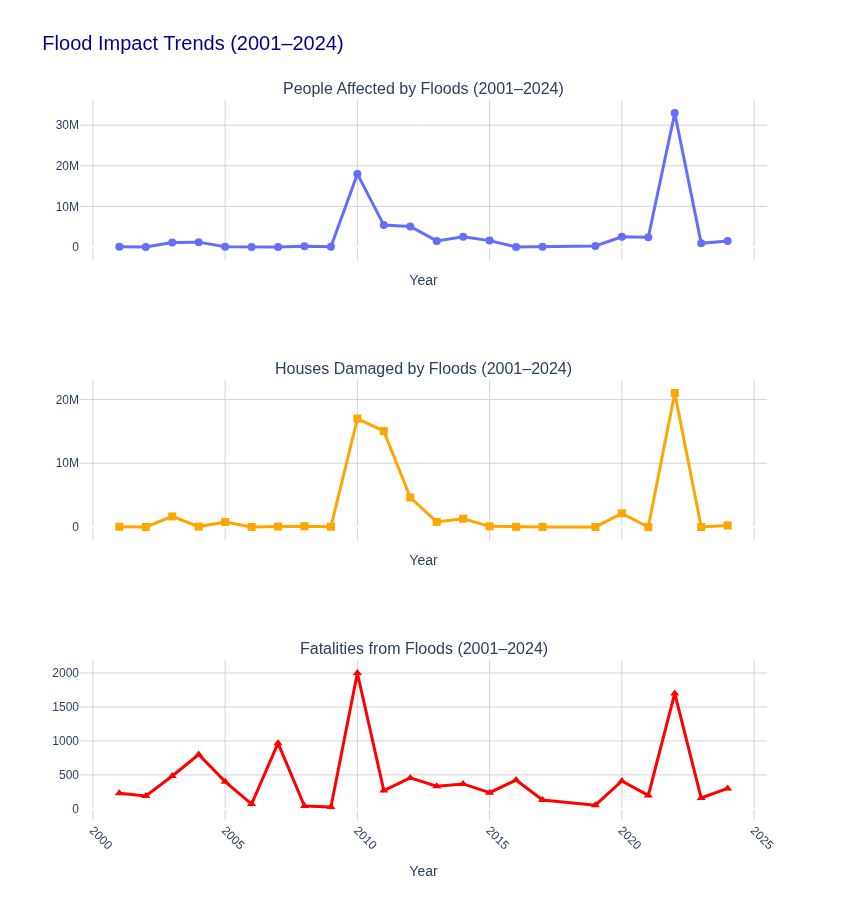

In [42]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create 3 subplots (rows = 3)
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    subplot_titles=[
        "People Affected by Floods (2001–2024)",
        "Houses Damaged by Floods (2001–2024)",
        "Fatalities from Floods (2001–2024)"
    ]
)

# 1️⃣ People Affected
fig.add_trace(
    go.Scatter(
        x=yearly_trends.index,
        y=yearly_trends['people_affected'],
        mode='lines+markers',
        marker=dict(symbol='circle', size=8),
        line=dict(width=3),
        name='People Affected'
    ),
    row=1, col=1
)

# 2️⃣ Houses Damaged
fig.add_trace(
    go.Scatter(
        x=yearly_trends.index,
        y=yearly_trends['houses_damaged'],
        mode='lines+markers',
        marker=dict(symbol='square', size=8, color='orange'),
        line=dict(width=3, color='orange'),
        name='Houses Damaged'
    ),
    row=2, col=1
)

# 3️⃣ Fatalities
fig.add_trace(
    go.Scatter(
        x=yearly_trends.index,
        y=yearly_trends['fatalities'],
        mode='lines+markers',
        marker=dict(symbol='triangle-up', size=8, color='red'),
        line=dict(width=3, color='red'),
        name='Fatalities'
    ),
    row=3, col=1
)

# Layout settings
fig.update_layout(
    height=900,
    width=800,
    showlegend=False,
    title_text="Flood Impact Trends (2001–2024)",
    title_font=dict(size=20, family='Arial', color='darkblue'),
    plot_bgcolor='white'
)

# X and Y axes formatting
fig.update_xaxes(title_text="Year", tickangle=45, showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

fig.show()


#### 3.4 Regional Analysis 

In [49]:
import re

regions = ['Sindh', 'Punjab', 'Balochistan', 'KP', 'Islamabad', 'Nationwide', 
           'Gilgit', 'Gilgit-Baltistan', 'AJ&K']

df_hist['main_region'] = df_hist['region'].apply(lambda x: (
    ', '.join(sorted({
        r for r in regions
        if isinstance(x, str) and r.lower() in re.sub(r'\(.*?\)', '', x).lower()
    })) or 'Other'
))

In [50]:
df_hist.head()

,region,people_affected,houses_damaged,fatalities,notes,source,main_region
year,,,,,,,
2001,"Islamabad, Rawalpindi (Punjab), Mansehra (KP)",55000,50000,230,Extreme cloudburst in Islamabad/Rawalpindi; vi...,"IFRC, UN-OCHA 15",Islamabad
2002,"Mardan, Sofaid Sung (KP)",100,5000,190,Heavy rains in KP; major agricultural damage.,IFRC 15,Other
2003,"Sindh (Thatta), Balochistan",1096726,1666580,484,Severe urban flooding in Karachi; above-normal...,"OCHA, Wikipedia 19","Balochistan, Sindh"
2004,"Eastern Pakistan, Punjab",1200000,70000,800,Heavy rains and water release from Indian dams.,"PBS, NDTV 22",Punjab
2005,"Balochistan (Gwadar), KP, Northern Areas",70000,780000,400,Dam burst in Balochistan after heavy rain/snow.,"NASA, OCHA 24","Balochistan, KP"


In [52]:
regional_stats = df_hist.groupby('region').agg({
    'people_affected': ['sum', 'mean', 'count'],
    'houses_damaged': 'sum',
    'fatalities': 'sum'
}).round(2)

In [54]:
regional_stats.head()

people_affected                   \
                                                     sum       mean count   
region                                                                      
Balochistan (Gwadar), KP, Northern Areas           70000    70000.0     1   
Balochistan, KP, Punjab                          1150000   575000.0     2   
Balochistan, KP, Punjab, Sindh                   1500000  1500000.0     1   
Balochistan, Nationwide                            60000    60000.0     1   
Eastern Pakistan, Punjab                         1200000  1200000.0     1   

                                         houses_damaged fatalities  
                                                    sum        sum  
region                                                              
Balochistan (Gwadar), KP, Northern Areas         780000        400  
Balochistan, KP, Punjab                           18300        212  
Balochistan, KP, Punjab, Sindh                   250000        300  
Balochistan, Nationwide                           14490        131  
Eastern Pakistan, Punjab                          70000        800

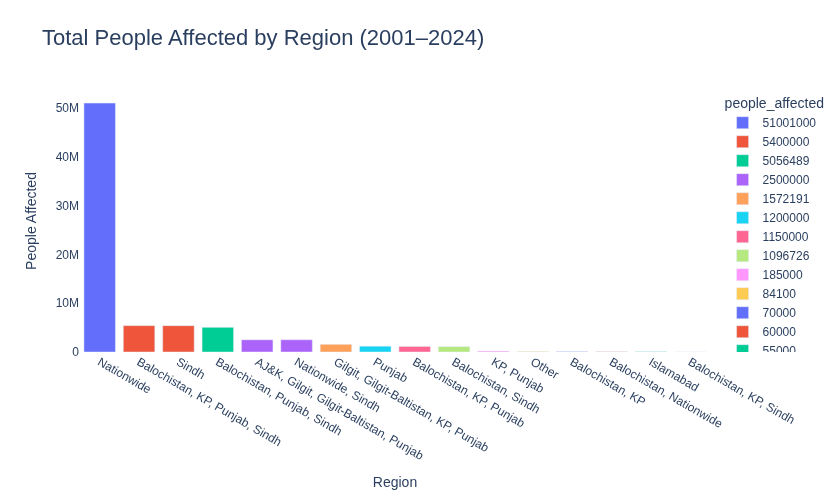

In [77]:
# Total People Affected by Region
import plotly.express as px

region_affected = (
    df_hist.groupby('main_region')['people_affected']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

fig1 = px.bar(
    region_affected,
    x='main_region',
    y='people_affected',
    title='Total People Affected by Region (2001–2024)',
    color='people_affected',
    color_continuous_scale='Blues'
)

fig1.update_layout(
    xaxis_title='Region',
    yaxis_title='People Affected',
    height=500,
    width=600,
    plot_bgcolor='white',
    margin=dict(t=90),
    title_font=dict(size=22)
)

fig1.show()


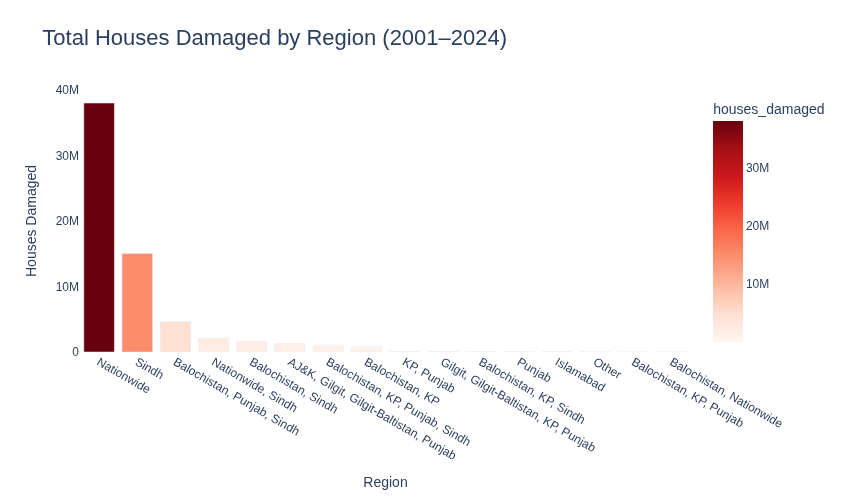

In [80]:
# Total Houses Damaged by Regions
region_houses = (
    df_hist.groupby('main_region')['houses_damaged']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

fig2 = px.bar(
    region_houses,
    x='main_region',
    y='houses_damaged',
    title='Total Houses Damaged by Region (2001–2024)',
    color='houses_damaged',
    color_continuous_scale='Reds'
)

fig2.update_layout(
    xaxis_title='Region',
    yaxis_title='Houses Damaged',
    height=500,
    width=600,
    plot_bgcolor='white',
    margin=dict(t=90),
    title_font=dict(size=22)
)

fig2.show()


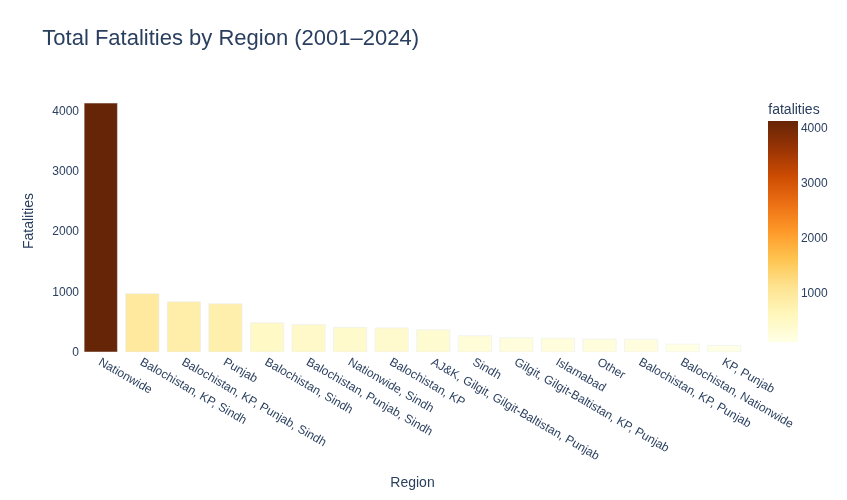

In [83]:
region_fatalities = (
    df_hist.groupby('main_region')['fatalities']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

fig3 = px.bar(
    region_fatalities,
    x='main_region',
    y='fatalities',
    title='Total Fatalities by Region (2001–2024)',
    color='fatalities',
    color_continuous_scale='YlOrBr'
)

fig3.update_layout(
    xaxis_title='Region',
    yaxis_title='Fatalities',
    height=500,
    width=600,
    plot_bgcolor='white',
    margin=dict(t=90),
    title_font=dict(size=22)
)

fig3.show()


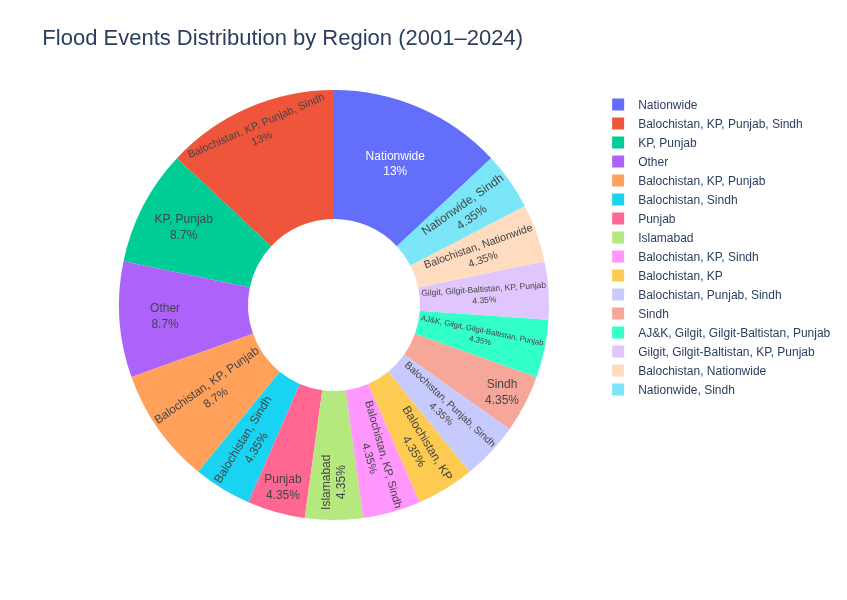

In [89]:
# Flood Events Distribution by Region (Pie Chart)
region_counts = (
    df_hist['main_region']
    .value_counts()
    .reset_index()
)
region_counts.columns = ['Region', 'EventCount']

fig4 = px.pie(
    region_counts,
    names='Region',
    values='EventCount',
    title='Flood Events Distribution by Region (2001–2024)',
    hole=0.4
)

fig4.update_traces(
    textposition='inside',
    textinfo='percent+label'
)

fig4.update_layout(
    height=600,
    width=600,
    margin=dict(t=90),
    title_font=dict(size=22)
)

fig4.show()


#### 3.5 Outliers Detection

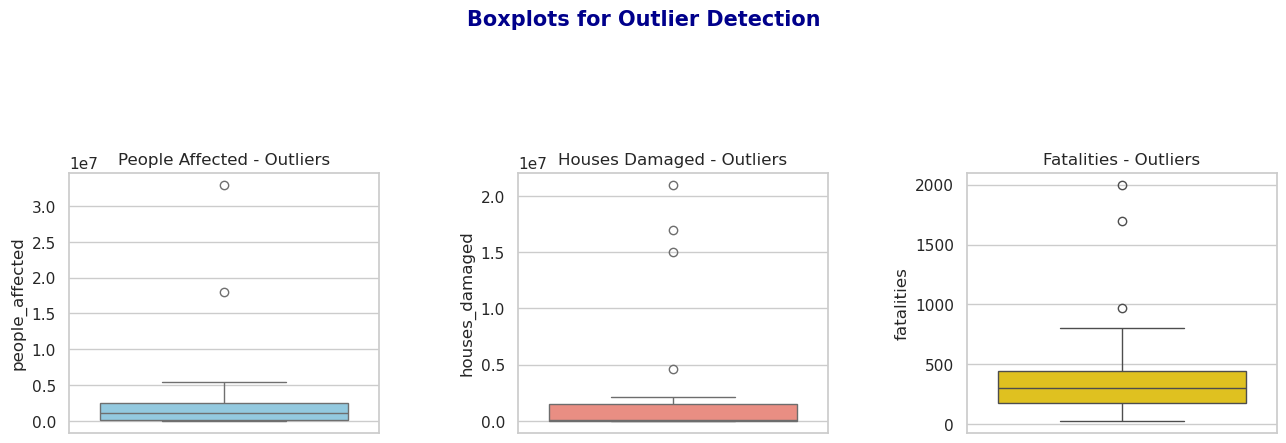

In [105]:
# Outlier Detection
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

sns.set(style="whitegrid", context="notebook")

# Boxplots for Outlier Detection 
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_hist['people_affected'], color='skyblue')
plt.title('People Affected - Outliers', fontsize=12)

plt.subplot(1, 3, 2)
sns.boxplot(y=df_hist['houses_damaged'], color='salmon')
plt.title('Houses Damaged - Outliers', fontsize=12)

plt.subplot(1, 3, 3)
sns.boxplot(y=df_hist['fatalities'], color='gold')
plt.title('Fatalities - Outliers', fontsize=12)

plt.suptitle("Boxplots for Outlier Detection", fontsize=15, color='darkblue', weight='bold')
plt.tight_layout(pad=4)
plt.savefig("outlier_detection_boxplots.png", dpi=300, bbox_inches='tight')
plt.show()


In [104]:
# Outlier Detection using IQR Method

from IPython.display import display, HTML
# title
print("\n" + "="*50 + "\n" + "⚠️  EXTREME VALUE ANALYSIS  ⚠️".center(50) + "\n" + "="*50)

for column in ['people_affected', 'houses_damaged', 'fatalities']:
    Q1 = df_hist[column].quantile(0.25)
    Q3 = df_hist[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_hist[(df_hist[column] < lower_bound) | (df_hist[column] > upper_bound)]
    count = len(outliers)

    display(HTML(f"<h4>{column}: {count} outliers detected</h4>"))

    if count > 0:
        display(outliers[[column, 'region', 'main_region']].head(5).style.set_caption("Top Outlier Records"))
    else:
        display(HTML("<p style='color:gray;'>No extreme values detected.</p>"))


          ⚠️  EXTREME VALUE ANALYSIS  ⚠️          


,people_affected,region,main_region
year,,,
2010,18000000,"Nationwide (KP, Sindh, Punjab, Balochistan)",Nationwide
2022,33000000,"Nationwide (Sindh, Balochistan worst hit)",Nationwide


,houses_damaged,region,main_region
year,,,
2010,17000000,"Nationwide (KP, Sindh, Punjab, Balochistan)",Nationwide
2011,15030980,Sindh,Sindh
2012,4627250,"Sindh, Balochistan, Punjab","Balochistan, Punjab, Sindh"
2022,21000000,"Nationwide (Sindh, Balochistan worst hit)",Nationwide


,fatalities,region,main_region
year,,,
2007,967,"KP, Sindh, coastal Balochistan","Balochistan, KP, Sindh"
2010,2000,"Nationwide (KP, Sindh, Punjab, Balochistan)",Nationwide
2022,1700,"Nationwide (Sindh, Balochistan worst hit)",Nationwide


### 3.6 Correlation Analysis


                 📊  CORRELATION ANALYSIS  📊                 


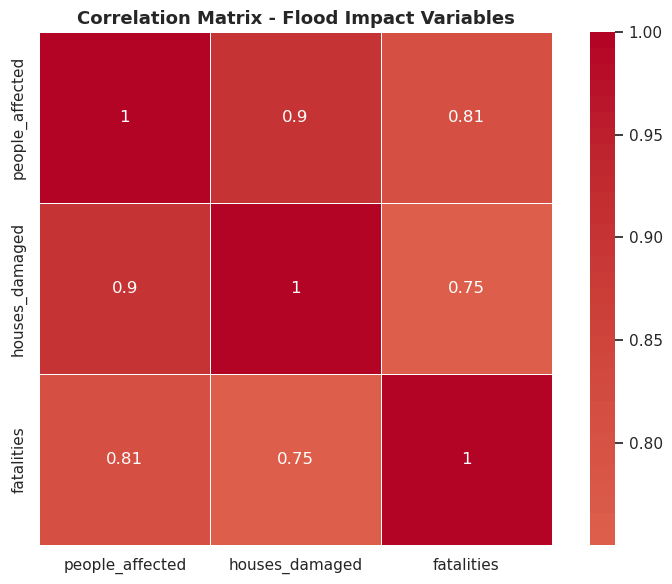

✅ **Saved:** `correlation_matrix_heatmap.png`

### 📈 Correlation Matrix

,people_affected,houses_damaged,fatalities
people_affected,1.000000,0.899965,0.811044
houses_damaged,0.899965,1.000000,0.750286
fatalities,0.811044,0.750286,1.000000


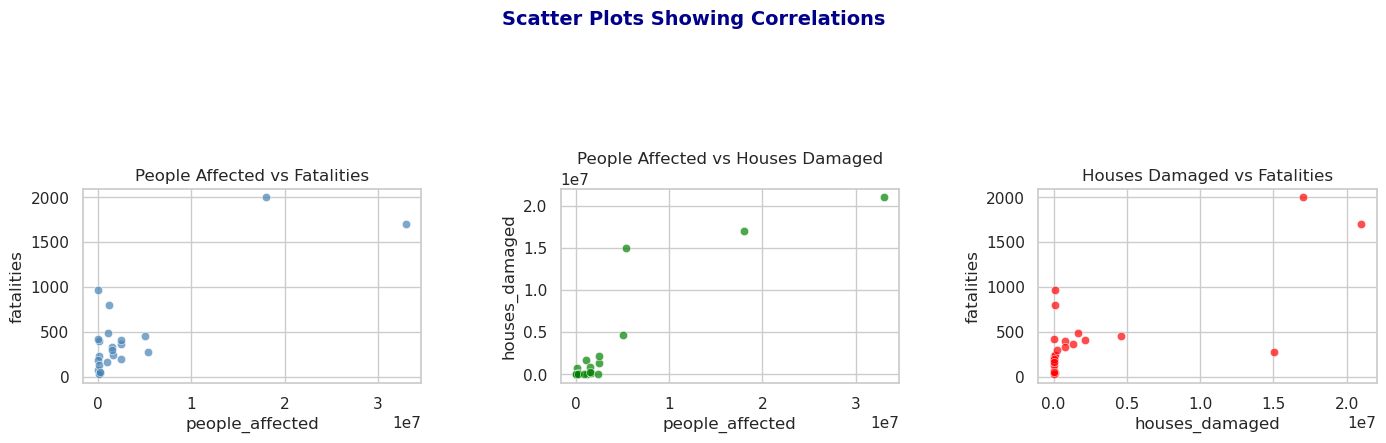

✅ **Saved:** `correlation_scatterplots.png`

In [110]:
# Correlation Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

print("\n" + "="*60)
print("📊  CORRELATION ANALYSIS  📊".center(60))
print("="*60)

# Compute correlation matrix
correlation_matrix = df_hist[['people_affected', 'houses_damaged', 'fatalities']].corr()

# Heatmap for Correlation 
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5
)
plt.title('Correlation Matrix - Flood Impact Variables', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.savefig("correlation_matrix_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("✅ **Saved:** `correlation_matrix_heatmap.png`"))

# Print correlation matrix
display(Markdown("### 📈 Correlation Matrix"))
display(correlation_matrix)

# Scatter plots to visualize relationships 
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='people_affected', y='fatalities', data=df_hist, color='steelblue', alpha=0.7)
plt.title('People Affected vs Fatalities')

plt.subplot(1, 3, 2)
sns.scatterplot(x='people_affected', y='houses_damaged', data=df_hist, color='green', alpha=0.7)
plt.title('People Affected vs Houses Damaged')

plt.subplot(1, 3, 3)
sns.scatterplot(x='houses_damaged', y='fatalities', data=df_hist, color='red', alpha=0.7)
plt.title('Houses Damaged vs Fatalities')

plt.suptitle("Scatter Plots Showing Correlations", fontsize=14, fontweight='bold', color='darkblue')
plt.tight_layout(pad=4)
plt.savefig("correlation_scatterplots.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("✅ **Saved:** `correlation_scatterplots.png`"))


### 3.7 TOP Worst Regions


              🔥  TOP WORST REGIONS ANALYSIS  🔥              


### 🌊 Top 5 Regions - People Affected

,region,people_affected,main_region
year,,,
2022,"Nationwide (Sindh, Balochistan worst hit)",33000000,Nationwide
2010,"Nationwide (KP, Sindh, Punjab, Balochistan)",18000000,Nationwide
2011,Sindh,5400000,Sindh
2012,"Sindh, Balochistan, Punjab",5056489,"Balochistan, Punjab, Sindh"
2014,"Punjab, AJ&K, Gilgit-Baltistan",2500000,"AJ&K, Gilgit, Gilgit-Baltistan, Punjab"


### 🏚️ Top 5 Regions - Houses Damaged

,region,houses_damaged,main_region
year,,,
2022,"Nationwide (Sindh, Balochistan worst hit)",21000000,Nationwide
2010,"Nationwide (KP, Sindh, Punjab, Balochistan)",17000000,Nationwide
2011,Sindh,15030980,Sindh
2012,"Sindh, Balochistan, Punjab",4627250,"Balochistan, Punjab, Sindh"
2020,"Sindh (Karachi), Nationwide",2145210,"Nationwide, Sindh"


### ⚰️ Top 5 Regions - Fatalities

,region,fatalities,main_region
year,,,
2010,"Nationwide (KP, Sindh, Punjab, Balochistan)",2000,Nationwide
2022,"Nationwide (Sindh, Balochistan worst hit)",1700,Nationwide
2007,"KP, Sindh, coastal Balochistan",967,"Balochistan, KP, Sindh"
2004,"Eastern Pakistan, Punjab",800,Punjab
2003,"Sindh (Thatta), Balochistan",484,"Balochistan, Sindh"


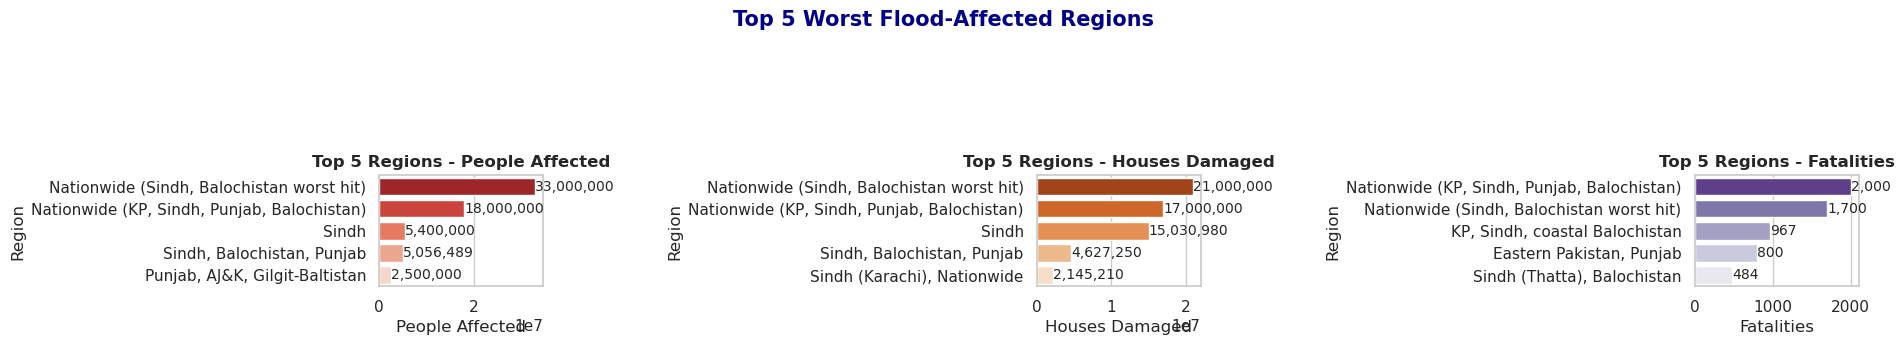

✅ **Saved:** `top_worst_regions_analysis.png`

In [120]:
# --- Fix column data types ---
numeric_cols = ['people_affected', 'houses_damaged', 'fatalities']
df_hist[numeric_cols] = df_hist[numeric_cols].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

# --- Top Worst Regions Analysis ---
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

print("\n" + "="*60)
print("🔥  TOP WORST REGIONS ANALYSIS  🔥".center(60))
print("="*60)

# --- Calculate top regions based on impact ---
worst_people = df_hist.nlargest(5, 'people_affected')[['region', 'people_affected', 'main_region']]
worst_houses = df_hist.nlargest(5, 'houses_damaged')[['region', 'houses_damaged', 'main_region']]
worst_fatalities = df_hist.nlargest(5, 'fatalities')[['region', 'fatalities', 'main_region']]

# --- Display top results ---
display(Markdown("### 🌊 Top 5 Regions - People Affected"))
display(worst_people)

display(Markdown("### 🏚️ Top 5 Regions - Houses Damaged"))
display(worst_houses)

display(Markdown("### ⚰️ Top 5 Regions - Fatalities"))
display(worst_fatalities)

# --- Visualization ---
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

# Helper function to create consistent bars with annotations
def plot_bar(ax, data, x, y, color, title, xlabel):
    sns.barplot(
        data=data,
        y=y, x=x,
        hue=y, palette=color,
        legend=False,
        ax=ax
    )
    for i, val in enumerate(data[x]):
        ax.text(val, i, f"{val:,.0f}", va='center', ha='left', fontsize=10)
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Region')

# People Affected
plot_bar(axes[0], worst_people, 'people_affected', 'region', 'Reds_r',
         'Top 5 Regions - People Affected', 'People Affected')

# Houses Damaged
plot_bar(axes[1], worst_houses, 'houses_damaged', 'region', 'Oranges_r',
         'Top 5 Regions - Houses Damaged', 'Houses Damaged')

# Fatalities
plot_bar(axes[2], worst_fatalities, 'fatalities', 'region', 'Purples_r',
         'Top 5 Regions - Fatalities', 'Fatalities')

plt.suptitle("Top 5 Worst Flood-Affected Regions", fontsize=15, color='darkblue', weight='bold')
plt.tight_layout(pad=4)
plt.savefig("top_worst_regions_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("✅ **Saved:** `top_worst_regions_analysis.png`"))


In [119]:
# Summary Statistics and Key Findings
from IPython.display import display, Markdown

# HEADER
display(Markdown("## 📊 **KEY FINDINGS AND SUMMARY**"))

# Overall Statistics
total_people = df_hist['people_affected'].sum()
total_houses = df_hist['houses_damaged'].sum()
total_fatalities = df_hist['fatalities'].sum()

avg_people = df_hist['people_affected'].mean()
avg_houses = df_hist['houses_damaged'].mean()
avg_fatalities = df_hist['fatalities'].mean()

display(Markdown(f"""
### 🌍 **Overall Statistics (2001–2024)**  
- 👥 **Total People Affected:** `{total_people:,.0f}`  
- 🏚️ **Total Houses Damaged:** `{total_houses:,.0f}`  
- ⚰️ **Total Fatalities:** `{total_fatalities:,.0f}`  

#### 📈 *Average per Flood Event:*
- 👥 **People Affected:** `{avg_people:,.0f}`
- 🏚️ **Houses Damaged:** `{avg_houses:,.0f}`
- ⚰️ **Fatalities:** `{avg_fatalities:,.0f}`
"""))

# --- Trends Observed ---
display(Markdown("""
### 📈 **Trends Observed**
- 🚨 **2022** was the worst year with catastrophic impact  
- 🌊 **Sindh** region is most frequently affected  
- 🔗 Strong correlation between **people affected** and **houses damaged**  
- 📅 Recent years show **increasing severity of floods**
"""))

# --- Recommendations ---
display(Markdown("""
### 🔍 **Recommendations for Further Analysis**
1. ☁️ Investigate **climate patterns** for worst years  
2. 🧭 Study **regional vulnerability** factors  
3. 💰 Analyze **economic impact** of housing damage  
4. 🧱 Explore **mitigation strategies** for high-risk regions  
"""))


## 📊 **KEY FINDINGS AND SUMMARY**


### 🌍 **Overall Statistics (2001–2024)**  
- 👥 **Total People Affected:** `77,332,506`  
- 🏚️ **Total Houses Damaged:** `65,126,130`  
- ⚰️ **Total Fatalities:** `10,246`  

#### 📈 *Average per Flood Event:*
- 👥 **People Affected:** `3,362,283`
- 🏚️ **Houses Damaged:** `2,831,571`
- ⚰️ **Fatalities:** `445`



### 📈 **Trends Observed**
- 🚨 **2022** was the worst year with catastrophic impact  
- 🌊 **Sindh** region is most frequently affected  
- 🔗 Strong correlation between **people affected** and **houses damaged**  
- 📅 Recent years show **increasing severity of floods**



### 🔍 **Recommendations for Further Analysis**
1. ☁️ Investigate **climate patterns** for worst years  
2. 🧭 Study **regional vulnerability** factors  
3. 💰 Analyze **economic impact** of housing damage  
4. 🧱 Explore **mitigation strategies** for high-risk regions  
